##Waste Management Using CNN Model

In [12]:
# Install kagglehub
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)


100%|██████████| 427M/427M [00:08<00:00, 55.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [1]:
!pip install opencv.python

In [53]:
import os

# Replace with the actual path to the 'DATASET' folder
dataset_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"

# List contents of TRAIN and TEST folders
O_path = os.path.join(dataset_path, "O")
R_path = os.path.join(dataset_path, "R")

print("Contents of O:", os.listdir(O_path))
print("Contents of R:", os.listdir(R_path))


Contents of O: ['O_10812.jpg', 'O_11244.jpg', 'O_7142.jpg', 'O_2186.jpg', 'O_10752.jpg', 'O_5525.jpg', 'O_6256.jpg', 'O_8754.jpg', 'O_6430.jpg', 'O_8676.jpg', 'O_987.jpg', 'O_5032.jpg', 'O_11604.jpg', 'O_6624.jpg', 'O_8661.jpg', 'O_9261.jpg', 'O_6242.jpg', 'O_3900.jpg', 'O_6148.jpg', 'O_5033.jpg', 'O_6337.jpg', 'O_11563.jpg', 'O_5656.jpg', 'O_3333.jpg', 'O_4569.jpg', 'O_9723.jpg', 'O_6850.jpg', 'O_3291.jpg', 'O_11968.jpg', 'O_528.jpg', 'O_5157.jpg', 'O_9867.jpg', 'O_819.jpg', 'O_4755.jpg', 'O_10947.jpg', 'O_9376.jpg', 'O_1828.jpg', 'O_10420.jpg', 'O_4448.jpg', 'O_12274.jpg', 'O_6699.jpg', 'O_11815.jpg', 'O_3096.jpg', 'O_12149.jpg', 'O_11141.jpg', 'O_10675.jpg', 'O_2910.jpg', 'O_12175.jpg', 'O_815.jpg', 'O_4860.jpg', 'O_1126.jpg', 'O_1751.jpg', 'O_8958.jpg', 'O_454.jpg', 'O_11645.jpg', 'O_8993.jpg', 'O_8902.jpg', 'O_11207.jpg', 'O_1088.jpg', 'O_7977.jpg', 'O_7831.jpg', 'O_3846.jpg', 'O_6737.jpg', 'O_5805.jpg', 'O_9038.jpg', 'O_11896.jpg', 'O_6183.jpg', 'O_12431.jpg', 'O_215.jpg', 'O_756

In [55]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [56]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [57]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [58]:
#visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array=cv2.imread(file)
    img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array=cv2.resize(img_array,(224,224))
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 12565/12565 [00:10<00:00, 1181.16it/s]


In [59]:
data.shape

(22564, 2)

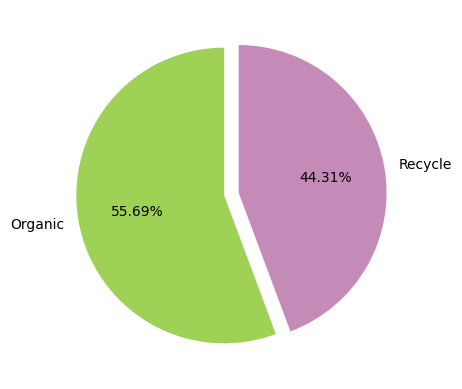

In [60]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recycle'], autopct='%0.2f%%', colors = colors, startangle = 90, explode=[0.05,0.05])
plt.show()